## Fuzzy - Imc
- Baseado em : https://www.abenge.org.br/cobenge/legado/arquivos/5/Artigos/129231.pdf
  - Variáveis de Entrada :
    - Peso : 40 a 120 Kg
    - Altura : 150 a 200 cm
  - Variáveis de Saída :
    - IMC : 16 a 41

- Verificação do calculo com a base do dados.gov : https://dados.gov.br/dados/conjuntos-dados/servico-militar

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=50968e415ffa9d737990e2810b1e9a9b6ddce3ad3aa7d74238e8f4db1fbfedd9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Importando bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Variáveis de entrada
peso = ctrl.Antecedent(np.arange(40, 121, 1), 'peso')
altura = ctrl.Antecedent(np.arange(150, 201, 1), 'altura')

In [ ]:
# Variável de saída
imc = ctrl.Consequent(np.arange(16, 41, 1), 'imc')

In [ ]:
# Funções de pertinência para as variáveis de entrada
peso['leve'] = fuzz.trapmf(peso.universe, [40, 40, 45,60])
peso['medio'] = fuzz.trimf(peso.universe, [50, 65, 80])
peso['alto'] = fuzz.trimf(peso.universe, [70, 85, 100])
peso['muito_alto'] = fuzz.trapmf(peso.universe, [90,105, 120, 120])

altura['baixa'] = fuzz.trapmf(altura.universe, [150, 150, 160, 165])
altura['media'] = fuzz.trimf(altura.universe, [160, 170, 180])
altura['alta'] = fuzz.trimf(altura.universe, [175, 182.5, 190])
altura['muito_alta'] = fuzz.trapmf(altura.universe, [185, 190, 200,200])

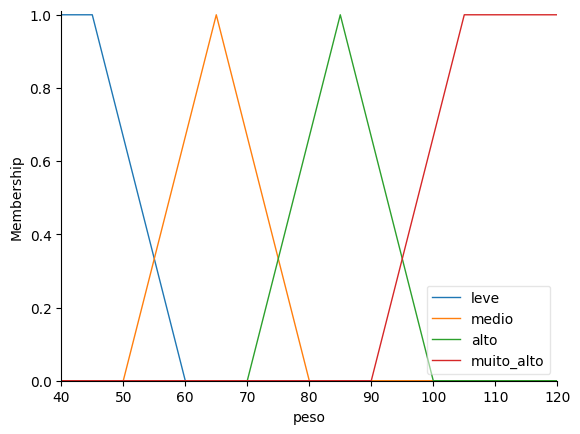

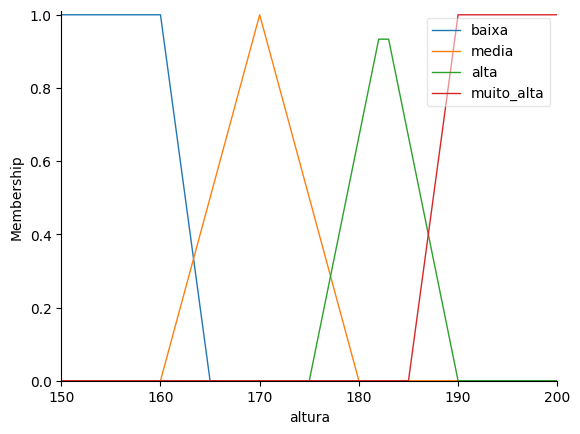

In [ ]:
# Visualização das funções de pertinência
peso.view()
altura.view()

In [ ]:
# Funções de pertinência para a variável de saída
imc['muito_magro'] = fuzz.trapmf(imc.universe, [16, 16, 17, 17.5])
imc['magro'] = fuzz.trimf(imc.universe, [17, 18, 19])
imc['normal'] = fuzz.trimf(imc.universe, [18.5, 22, 25])
imc['acima_do_peso'] = fuzz.trimf(imc.universe, [24.5, 27.5, 30.5])
imc['obesidade_1'] = fuzz.trimf(imc.universe, [29.5, 33, 36])
imc['obesidade_2'] = fuzz.trimf(imc.universe, [35, 37, 40])
imc['obesidade_3'] = fuzz.trapmf(imc.universe, [38, 39, 41, 41])

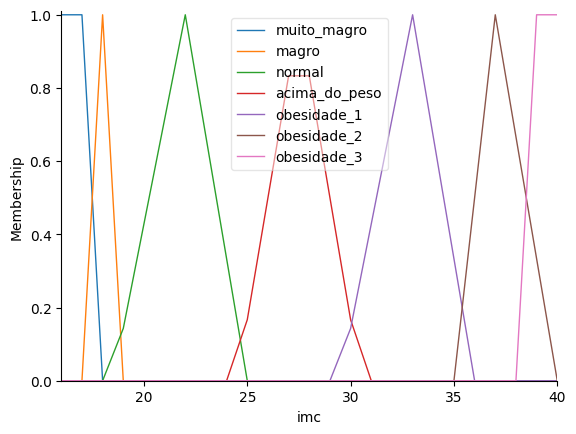

In [ ]:
imc.view()

In [ ]:
#Regras
regra1 = ctrl.Rule(peso['leve'] & altura['baixa'], imc['normal'])
regra2 = ctrl.Rule(peso['leve'] & altura['media'], imc['magro'])
regra3 = ctrl.Rule(peso['leve'] & altura['alta'], imc['muito_magro'])
regra4 = ctrl.Rule(peso['leve'] & altura['muito_alta'], imc['muito_magro'])

regra5 = ctrl.Rule(peso['medio'] & altura['baixa'], imc['acima_do_peso'])
regra6 = ctrl.Rule(peso['medio'] & altura['media'], imc['normal'])
regra7 = ctrl.Rule(peso['medio'] & altura['alta'], imc['magro'])
regra8 = ctrl.Rule(peso['medio'] & altura['muito_alta'], imc['muito_magro'])

regra9 = ctrl.Rule(peso['alto'] & altura['baixa'], imc['obesidade_1'])
regra10 = ctrl.Rule(peso['alto'] & altura['media'], imc['acima_do_peso'])
regra11 = ctrl.Rule(peso['alto'] & altura['alta'], imc['normal'])
regra12 = ctrl.Rule(peso['alto'] & altura['muito_alta'], imc['magro'])

regra13 = ctrl.Rule(peso['muito_alto'] & altura['baixa'], imc['obesidade_2'])
regra14 = ctrl.Rule(peso['muito_alto'] & altura['media'], imc['obesidade_1'])
regra15 = ctrl.Rule(peso['muito_alto'] & altura['alta'], imc['acima_do_peso'])
regra16 = ctrl.Rule(peso['muito_alto'] & altura['muito_alta'], imc['normal'])

In [ ]:
sistema_controle = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8,
    regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16
])

In [ ]:
simulacao = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
# Entradas
simulacao.input['peso'] = 55.9
simulacao.input['altura'] = 167

# Computa o resultado
simulacao.compute()

# Saída
print(simulacao.output['imc'])
#imc.view(sim=simulacao)

print(nivel_linguistico_imc(simulacao.output['imc']))

plt.show()

21.10113887727573


NameError: name 'nivel_linguistico_imc' is not defined

In [ ]:
simulacao.output

OrderedDict([('imc', 25.466232796827615)])

In [ ]:
def nivel_linguistico_imc(valor_imc):
    if valor_imc <= 18.5:
        return "Magro"
    elif valor_imc <= 24.9:
        return "Normal"
    elif valor_imc <= 29.9:
        return "Acima do Peso"
    elif valor_imc <= 34.9:
        return "Obesidade Grau 1"
    elif valor_imc <= 39.9:
        return "Obesidade Grau 2"
    else:
        return "Obesidade Grau 3"


In [ ]:
def calcular_imc(peso, altura_cm):
    # Convertendo altura de centímetros para metros
    altura = altura_cm / 100
    # Calcula o IMC
    imc = peso / (altura ** 2)
    return imc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/IMC/sermil2022.csv'
df = pd.read_csv(path)

In [ ]:
df.head(2)

,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1960,69.0,176.0,56.0,42.0,NaN,RIO DE JANEIRO,RJ,BRASIL,Casado,...,Ensino Superior Completo,2022,Sem dispensa,Urbana,FORTALEZA,CE,BRASIL,25/26 - CAMOCIM,CAMOCIM,CE
1,1995,79.0,181.0,56.0,41.0,88.0,PALMEIRA DAS MISSOES,RS,BRASIL,Solteiro,...,Ensino Médio Completo,2022,Com dispensa,Urbana,CANOAS,RS,BRASIL,10/52 - PALMEIRA DAS MISSOES,PALMEIRA DAS MISSOES,RS


In [ ]:
df_imc = df.loc[:, ['PESO', 'ALTURA']]
df_imc_nona = df_imc.dropna()

In [ ]:
df_imc_nona['IMC'] = None
df_imc_nona['IMC_FUZZY'] = None
df_imc_nona['COMPARACAO'] = None

<ipython-input-269-1a61ac958dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC'] = None
<ipython-input-269-1a61ac958dc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC_FUZZY'] = None
<ipython-input-269-1a61ac958dc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
df_imc_nona

,PESO,ALTURA,IMC,IMC_FUZZY,COMPARACAO
0,69.0,176.0,None,None,None
1,79.0,181.0,None,None,None
2,64.0,165.0,None,None,None
3,55.0,180.0,None,None,None
4,76.0,186.0,None,None,None
...,...,...,...,...,...
301458,66.0,179.0,None,None,None
301459,66.0,174.0,None,None,None
301460,72.0,174.0,None,None,None
301461,60.0,168.0,None,None,None


In [ ]:
imcs = []
imcs_fuzzy = []
comparacao = []

for indice, linha in df_imc_nona.iterrows():
    print('Indice : ', indice)
    df_peso = linha['PESO']
    df_altura = linha['ALTURA']

    imc = calcular_imc(df_peso, df_altura)
    imcs.append(nivel_linguistico_imc(imc))

    simulacao.input['peso'] = df_peso
    simulacao.input['altura'] = df_altura
    simulacao.compute()
    imcs_fuzzy.append(nivel_linguistico_imc(simulacao.output['imc']))





A saída de streaming foi truncada nas últimas 5000 linhas.
Indice :  296456
Indice :  296457
Indice :  296458
Indice :  296459
Indice :  296460
Indice :  296461
Indice :  296462
Indice :  296463
Indice :  296464
Indice :  296465
Indice :  296466
Indice :  296467
Indice :  296468
Indice :  296469
Indice :  296470
Indice :  296471
Indice :  296472
Indice :  296473
Indice :  296474
Indice :  296475
Indice :  296476
Indice :  296477
Indice :  296478
Indice :  296479
Indice :  296480
Indice :  296481
Indice :  296482
Indice :  296483
Indice :  296484
Indice :  296485
Indice :  296486
Indice :  296487
Indice :  296488
Indice :  296489
Indice :  296490
Indice :  296491
Indice :  296492
Indice :  296493
Indice :  296494
Indice :  296495
Indice :  296496
Indice :  296497
Indice :  296498
Indice :  296499
Indice :  296500
Indice :  296501
Indice :  296502
Indice :  296503
Indice :  296504
Indice :  296505
Indice :  296506
Indice :  296507
Indice :  296508
Indice :  296509
Indice :  296510
Indice

In [ ]:
df_imc_nona['IMC'] = imcs
df_imc_nona['IMC_FUZZY'] = imcs_fuzzy

<ipython-input-284-4e277cd03001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC'] = imcs
<ipython-input-284-4e277cd03001>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC_FUZZY'] = imcs_fuzzy


In [ ]:
df_imc_nona.head(20)

,PESO,ALTURA,IMC,IMC_FUZZY,COMPARACAO
0,69.0,176.0,Magro,Normal,None
1,79.0,181.0,Magro,Normal,None
2,64.0,165.0,Magro,Normal,None
3,55.0,180.0,Magro,Magro,None
4,76.0,186.0,Magro,Normal,None
5,76.0,184.0,Magro,Normal,None
6,60.0,165.0,Magro,Normal,None
7,98.0,184.0,Magro,Acima do Peso,None
8,78.0,175.0,Magro,Acima do Peso,None
9,80.0,170.0,Magro,Acima do Peso,None
